In [3]:
import pandas as pd
data=pd.read_csv("C:\\Users\\Reetika\\Desktop\\datasets\\hotelsnew.csv")

In [4]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import itertools


In [5]:
import  plotly.graph_objs as go
from plotly.offline import download_plotlyjs ,iplot, init_notebook_mode
#%matplotlib inline
init_notebook_mode(connected=True)
data

address  \
0      Riviera San Nicol 11/a   
1      Riviera San Nicol 11/a   
2      Riviera San Nicol 11/a   
3      Riviera San Nicol 11/a   
4      Riviera San Nicol 11/a   
5      Riviera San Nicol 11/a   
6      Riviera San Nicol 11/a   
7      Riviera San Nicol 11/a   
8      Riviera San Nicol 11/a   
9      Riviera San Nicol 11/a   
10     Riviera San Nicol 11/a   
11     Riviera San Nicol 11/a   
12     Riviera San Nicol 11/a   
13     Riviera San Nicol 11/a   
14     Riviera San Nicol 11/a   
15     Riviera San Nicol 11/a   
16     Riviera San Nicol 11/a   
17     Riviera San Nicol 11/a   
18     Riviera San Nicol 11/a   
19     Riviera San Nicol 11/a   
20     Riviera San Nicol 11/a   
21     Riviera San Nicol 11/a   
22     Riviera San Nicol 11/a   
23     Riviera San Nicol 11/a   
24     Riviera San Nicol 11/a   
25     Riviera San Nicol 11/a   
26     Riviera San Nicol 11/a   
27     Riviera San Nicol 11/a   
28     Riviera San Nicol 11/a   
29     Riviera San Nicol 11/a   
...                       ...   
35882      1088 Powdermill Rd   
35883      1088 Powdermill Rd   
35884      1088 Powdermill Rd   
35885      1088 Powdermill Rd   
35886      1088 Powdermill Rd   
35887      1088 Powdermill Rd   
35888      1088 Powdermill Rd   
35889      1088 Powdermill Rd   
35890      1088 Powdermill Rd   
35891      1088 Powdermill Rd   
35892      1088 Powdermill Rd   
35893      1088 Powdermill Rd   
35894      1088 Powdermill Rd   
35895      1088 Powdermill Rd   
35896      1088 Powdermill Rd   
35897      1088 Powdermill Rd   
35898      1088 Powdermill Rd   
35899      1088 Powdermill Rd   
35900      1088 Powdermill Rd   
35901      1088 Powdermill Rd   
35902      1088 Powdermill Rd   
35903      1088 Powdermill Rd   
35904      1088 Powdermill Rd   
35905      1088 Powdermill Rd   
35906      1088 Powdermill Rd   
35907      1088 Powdermill Rd   
35908      1088 Powdermill Rd   
35909      1088 Powdermill Rd   
35910        3747 29th St S E   
35911        3747 29th St S E   

                                              categories          city  \
0                                                 Hotels      Mableton   
1                                                 Hotels      Mableton   
2                                                 Hotels      Mableton   
3                                                 Hotels      Mableton   
4                                                 Hotels      Mableton   
5                                                 Hotels      Mableton   
6                                                 Hotels      Mableton   
7                                                 Hotels      Mableton   
8                                                 Hotels      Mableton   
9                                                 Hotels      Mableton   
10                                                Hotels      Mableton   
11                                                Hotels      Mableton   
12                                                Hotels      Mableton   
13                                                Hotels      Mableton   
14                                                Hotels      Mableton   
15                                                Hotels      Mableton   
16                                                Hotels      Mableton   
17                                                Hotels      Mableton   
18                                                Hotels      Mableton   
19                                                Hotels      Mableton   
20                                                Hotels      Mableton   
21                                                Hotels      Mableton   
22                                                Hotels      Mableton   
23                                                Hotels      Mableton   
24                                                Hotels      Mableton   
25                                                H

In [6]:

#Filter out ratings that are zero
data = data[data['reviews.rating']>0]
#Renaming column names that have a '.' in them
data = data.rename(index=str, columns={'reviews.date':'reviewsdate', 'reviews.dateAdded':'reviewsdateAdded',
       'reviews.doRecommend':'reviewsdoRecommend', 'reviews.id':'reviewsid', 'reviews.rating':'reviewsrating', 'reviews.text':'reviewstext',
       'reviews.title':'reviewstitle', 'reviews.userCity':'reviewsuserCity', 'reviews.username':'reviewsusername',
       'reviews.userProvince':'reviewsuserProvince'})
data.reviewstext = data.reviewstext.fillna('x')
#A few hundred ratings had a score above 5, filtering these out
data = data[data['reviewsrating']<=5]
#A few hundred ratings had decimals, rounding each of those down to an integer
data.reviewsrating = data.reviewsrating.astype(int)

In [7]:
#Creating a function that we will use to clean review strings
#Function makes the string 'txt' lowercase, removes stopwords, finds the length, and pulls out only adjectives
#Returns a list of the length, cleaned txt, and only adjective txt
def cleanme(txt):
    sent = txt.lower()
    wrds = word_tokenize(sent)
    clwrds = [w for w in wrds if not w in stopwords.words('english','french','spanish')]
    ln = len(clwrds)
    pos = pd.DataFrame(pos_tag(wrds))
    pos = " ".join(list(pos[pos[1].str.contains("JJ")].iloc[:,0]))
    rt = [ln, " ".join(clwrds), pos]
    return(rt)
cleanme("he is a good boy")

[2, 'good boy', 'good']

In [8]:
data.country.unique()

array(['US'], dtype=object)

In [9]:
plt1 = go.Scatter(x = data.longitude, y=data.latitude, mode = 'markers')
lyt1 = go.Layout(title="Locations of Hotel Reviews", xaxis=dict(title='Longitude'), yaxis=dict(title='Latitude'))
fig1 = go.Figure(data=[plt1], layout=lyt1)
iplot(fig1)


In [10]:
#Create a field that shows the length of each review
tmp = list()
for i in range(len(data)):
    tmp.append(cleanme(data.iloc[i,:]['reviewstext']))
tmp = pd.DataFrame(tmp)
tmp.columns = ['reviewlen', 'cleanrev', 'adjreview']


In [11]:
#Add calculated columns back to the dataset
data = data.reset_index(drop=True)
data = pd.concat([data,tmp], axis=1)
data.head()

address categories      city country   latitude  longitude  \
0  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
1  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
2  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
3  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   
4  Riviera San Nicol 11/a     Hotels  Mableton      US  45.421611  12.376187   

                 name postalCode province           reviewsdate  \
0  Hotel Russo Palace      30126       GA  2013-09-22T00:00:00Z   
1  Hotel Russo Palace      30126       GA  2015-04-03T00:00:00Z   
2  Hotel Russo Palace      30126       GA  2014-05-13T00:00:00Z   
3  Hotel Russo Palace      30126       GA  2013-10-27T00:00:00Z   
4  Hotel Russo Palace      30126       GA  2015-03-05T00:00:00Z   

                         ...                         reviewsid  reviewsrating  \
0                        ...                               NaN              4   
1                        ...                               NaN              5   
2                        ...                               NaN              5   
3                        ...                               NaN              5   
4                        ...                               NaN              5   

                                         reviewstext  \
0  Pleasant 10 min walk along the sea front to th...   
1  Really lovely hotel. Stayed on the very top fl...   
2  Ett mycket bra hotell. Det som drog ner betyge...   
3  We stayed here for four nights in October. The...   
4  We stayed here for four nights in October. The...   

                         reviewstitle reviewsuserCity reviewsusername  \
0  Good location away from the crouds             NaN     Russ (kent)   
1      Great hotel with Jacuzzi bath!             NaN      A Traveler   
2                         Lugnt l��ge             NaN            Maud   
3          Good location on the Lido.             NaN           Julie   
4              ������ ���������������             NaN        sungchul   

  reviewsuserProvince reviewlen  \
0                 NaN        31   
1                 NaN        31   
2                 NaN        28   
3                 NaN        41   
4                 NaN        41   

                                            cleanrev  \
0  pleasant 10 min walk along sea front water bus...   
1  really lovely hotel . stayed top floor surpris...   
2  ett mycket bra hotell . det som drog ner betyg...   
3  stayed four nights october . hotel staff welco...   
4  stayed four nights october . hotel staff welco...   

                                           adjreview  
0                          pleasant comfortable good  
1  lovely top jacuzzi friendly helpful included g...  
2                                       fick full av  
3  friendly helpful clean comfortable- good wide ...  
4  friendly helpful clean comfortable- good wide ...  

[5 rows x 22 columns]

In [12]:
plt2 = go.Histogram(x = data.reviewlen)
lyt2 = go.Layout(title="Frequency of Review Length", xaxis=dict(title='Review Length', range=[0,400]), yaxis=dict(title='Frequency'))
fig2 = go.Figure(data=[plt2], layout=lyt2)
iplot(fig2)

In [13]:
data = data.sort_values(by='reviewlen')
plt3 = go.Scatter(x = data.reviewlen, y = data.reviewsrating, mode='markers')
lyt3 = go.Layout(title="Review Length vs. Star Rating", xaxis=dict(title='Review Length'),yaxis=dict(title='Rating'))
fig3 = go.Figure(data=[plt3], layout=lyt3)
iplot(fig3)
print("Review Length to Rating Correlation:",data.reviewlen.corr(data.reviewsrating))

Review Length to Rating Correlation: -0.14914248737739275


In [14]:
#Setting up the X and Y data, where X is the review text and Y is the rating
#Three different inputs will be used: original review text, cleaned review text, and only adjectives review text
x1 = data.reviewstext
x2 = data.cleanrev
x3 = data.adjreview
y = data.reviewsrating

In [15]:
#Creating a vectorizer to split the text into unigrams and bigrams
vect = TfidfVectorizer(ngram_range = (1,2))
x_vect1 = vect.fit_transform(x1)
x_vect2 = vect.fit_transform(x2)
x_vect3 = vect.fit_transform(x3)

In [19]:
#Making some simple functions for linear svc, knn
def linsvc(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = LinearSVC()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Linear SVC:",accuracy_score(y_test, pred))
    return(y_test, pred)

def revknn(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = KNeighborsClassifier(n_neighbors=2)
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("kNN:",accuracy_score(y_test, pred))
    return(y_test, pred)

def revnb(x,y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 10)
    classf = MultinomialNB()
    classf.fit(x_train, y_train)
    pred = classf.predict(x_test)
    print("Naive Bayes:",accuracy_score(y_test, pred))
    return(y_test, pred)


In [20]:
svmy1,svmp1 = linsvc(x_vect1,y)
svmy2,svmp2 = linsvc(x_vect2,y)
svmy3,svmp3 = linsvc(x_vect3,y)

knny1,knnp1 = revknn(x_vect1,y)
knny2,knnp2 = revknn(x_vect2,y)
knny3,knnp3 = revknn(x_vect3,y)

nby1,nbp1 = revnb(x_vect1,y)
nby2,nbp2 = revnb(x_vect2,y)
nby3,nbp3 = revnb(x_vect3,y)


Linear SVC: 0.5248573757131214
Linear SVC: 0.5202002561415764
Linear SVC: 0.45278845034346255
kNN: 0.30131563627896146
kNN: 0.30178134823611596
kNN: 0.30026778437536383
Naive Bayes: 0.4016765630457562
Naive Bayes: 0.40516940272441493
Naive Bayes: 0.4226336011177087


In [22]:
#This function will plot a confusion matrix and is taken from the sklearn documentation with just some minor tweaks
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.around((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]),decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
         plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          1       0.58      0.59      0.59       755
          2       0.39      0.20      0.27       747
          3       0.41      0.31      0.35      1468
          4       0.44      0.44      0.44      2461
          5       0.62      0.75      0.68      3158

avg / total       0.51      0.52      0.51      8589

             precision    recall  f1-score   support

          1       0.57      0.56      0.56       755
          2       0.36      0.17      0.23       747
          3       0.41      0.31      0.35      1468
          4       0.44      0.44      0.44      2461
          5       0.61      0.75      0.67      3158

avg / total       0.50      0.52      0.50      8589

             precision    recall  f1-score   support

          1       0.91      0.03      0.05       755
          2       0.00      0.00      0.00       747
          3       0.27      0.01      0.02      1468
          4       0.29      0.18      0

C:\Users\Reetika\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Confusion matrix, without normalization
[[ 426   83   91   69   86]
 [ 173  130  215  148   81]
 [  90  103  448  520  307]
 [  36   39  258 1094 1034]
 [  28   11   78  671 2370]]
Confusion matrix, without normalization
[[  20    0   17  196  522]
 [   2    0   12  294  439]
 [   0    0   14  443 1011]
 [   0    0    7  436 2018]
 [   0    0    2  146 3010]]


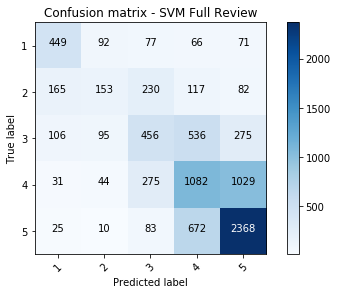

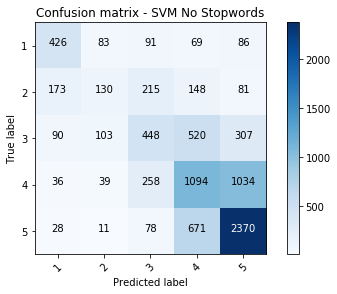

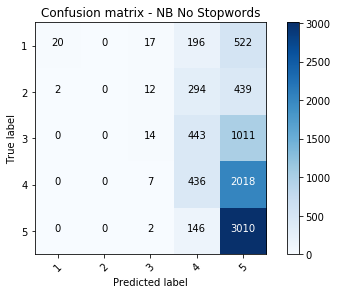

In [24]:
c1 = confusion_matrix(svmy1,svmp1)
print(classification_report(svmy1,svmp1))
c2 = confusion_matrix(svmy2,svmp2)
print(classification_report(svmy2,svmp2))
c3 = confusion_matrix(nby1,nbp2)
print(classification_report(nby1,nbp2))
class_names = ['1', '2', '3', '4', '5']
plt.figure()
plot_confusion_matrix(c1, classes=class_names,normalize=False,title='Confusion matrix - SVM Full Review')

plt.figure()
plot_confusion_matrix(c2, classes=class_names,normalize=False,title='Confusion matrix - SVM No Stopwords')
plt.figure()
plot_confusion_matrix(c3, classes=class_names,normalize=False,title='Confusion matrix - NB No Stopwords')